# Garments Project (by: The Guo Family)

Garmets are worn every day by humans around the world. From the famous and highly sought after fashion houses such as the Haus of Gucci, Louis Vitton, Dior, down to the smaller fashion labels, humans have the tendency to buy what is on the shelf. But, behind all the garments that are sold on a day to day basis, what goes behind the scenes? In this project, we dive deep into the schedules that fashion houses work after and see what patterns emerge from their outputs.

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np
import seaborn as sns
import torch
import csv
import math

In [252]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("garments.csv")

In [253]:
# Create a dictionary to store blank counts per column
blank_counts_per_column = {}

# Iterate over each column to count blank cells
for column in df.columns:
    # Count NaN and empty strings
    blank_count = df[column].isna().sum() + (df[column] == '').sum()
    blank_counts_per_column[column] = blank_count

# Convert to DataFrame for better display
blank_counts_df = pd.DataFrame(list(blank_counts_per_column.items()), columns=['Column', 'Blank Count'])

print(blank_counts_df)

                   Column  Blank Count
0                    date            0
1                 quarter            0
2              department            0
3                     day            0
4                    team            0
5   targeted_productivity            0
6                     smv            0
7                     wip          506
8               over_time            0
9               incentive            0
10              idle_time            0
11               idle_men            0
12     no_of_style_change            0
13          no_of_workers            0
14    actual_productivity            0


In [254]:
# Replace NaN values with 0
df = df.fillna(0)

# Replace empty strings with 0
df = df.replace('', 0)

In [255]:
# Create a dictionary to store blank counts per column
blank_counts_per_column = {}

# Iterate over each column to count blank cells
for column in df.columns:
    # Count NaN and empty strings
    blank_count = df[column].isna().sum() + (df[column] == '').sum()
    blank_counts_per_column[column] = blank_count

# Convert to DataFrame for better display
blank_counts_df = pd.DataFrame(list(blank_counts_per_column.items()), columns=['Column', 'Blank Count'])

print(blank_counts_df)

                   Column  Blank Count
0                    date            0
1                 quarter            0
2              department            0
3                     day            0
4                    team            0
5   targeted_productivity            0
6                     smv            0
7                     wip            0
8               over_time            0
9               incentive            0
10              idle_time            0
11               idle_men            0
12     no_of_style_change            0
13          no_of_workers            0
14    actual_productivity            0


In [256]:
# Number of entries (rows) in the DataFrame
num_entries = df.shape[0]

print(f"Number of entries in the DataFrame: {num_entries}")

Number of entries in the DataFrame: 1197


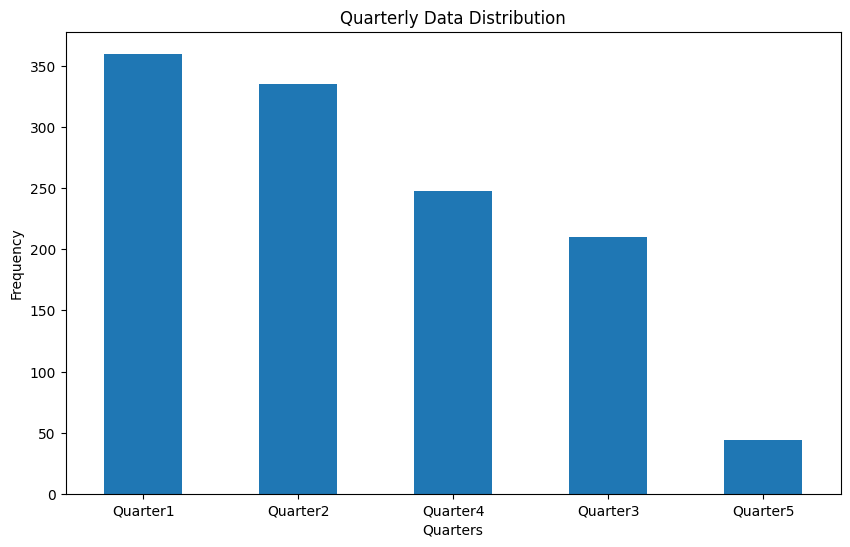

In [257]:
# Count occurrences of each quarter
quarter_counts = df['quarter'].value_counts()

# Create a histogram
plt.figure(figsize=(10, 6))
quarter_counts.plot(kind='bar')
plt.title('Quarterly Data Distribution')
plt.xlabel('Quarters')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

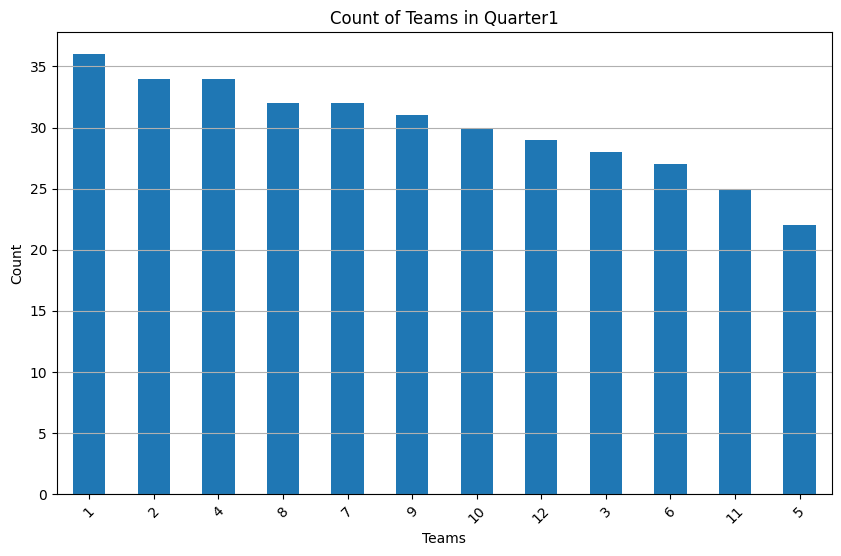

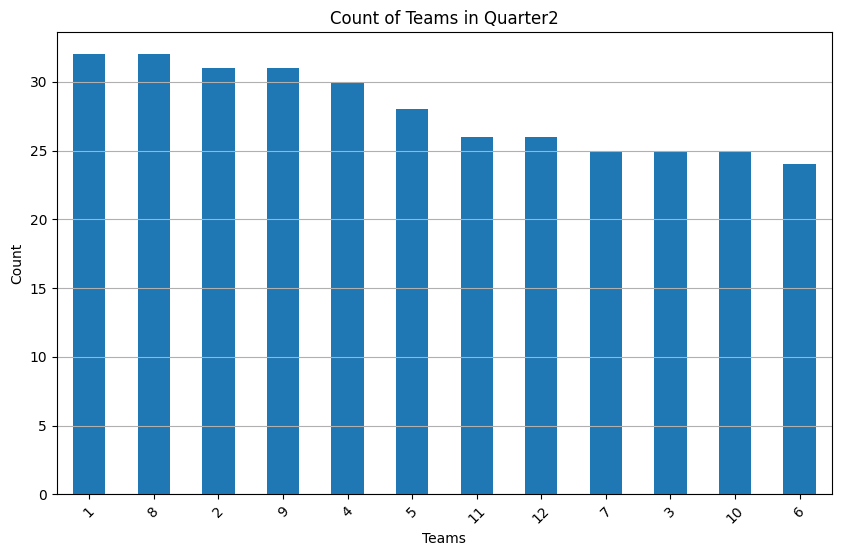

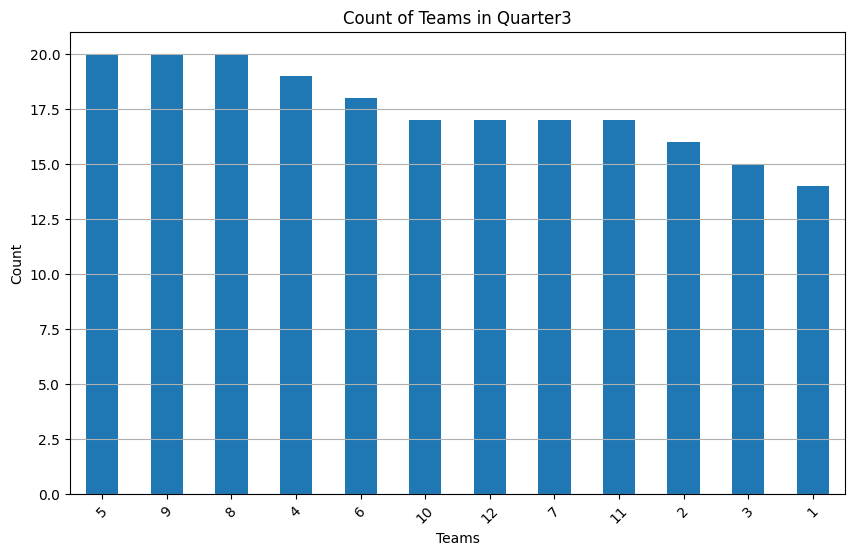

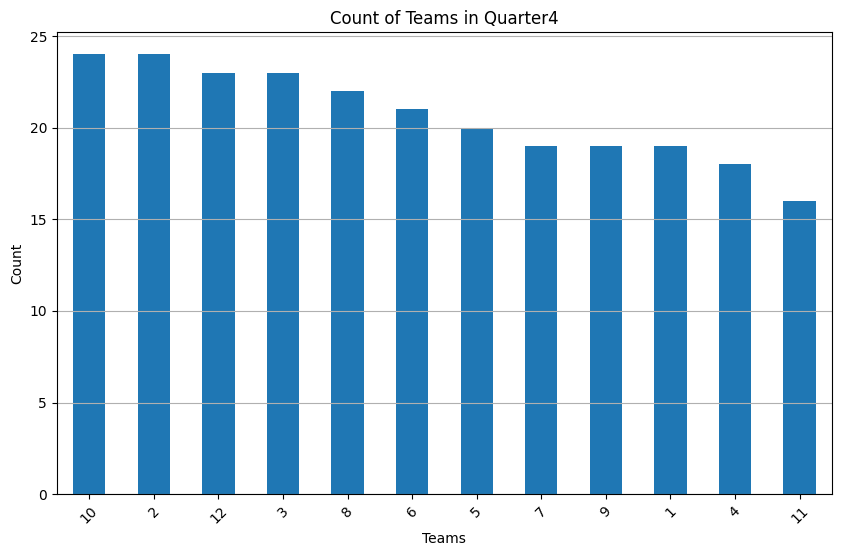

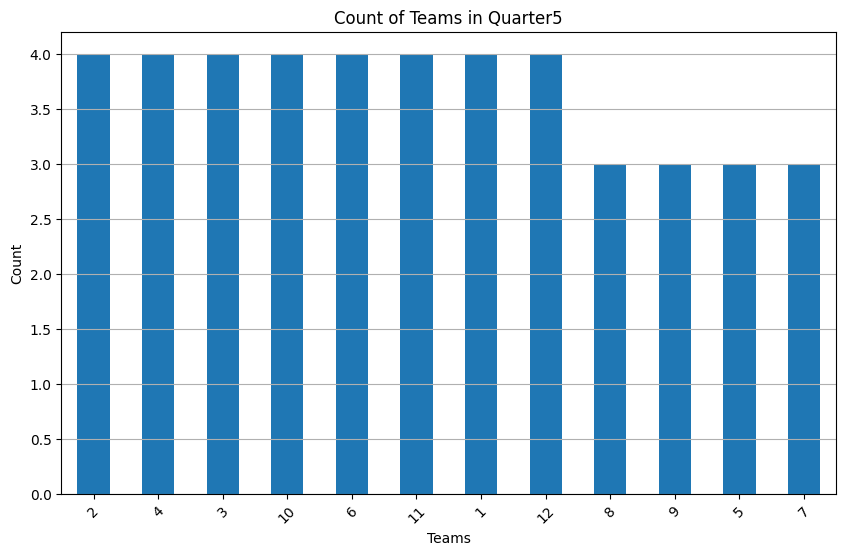

Number of entries in the DataFrame: 1197


In [258]:
# Proceed with your analysis and plotting
unique_quarter = df['quarter'].unique()
for quarter in unique_quarter:
    quarter_df = df[df['quarter'] == quarter]
    team_counts = quarter_df['team'].value_counts()  # Adjust 'team' to your actual column name

    plt.figure(figsize=(10, 6))
    team_counts.plot(kind='bar')
    plt.title(f'Count of Teams in {quarter}')
    plt.xlabel('Teams')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Number of entries (rows) in the DataFrame
num_entries = df.shape[0]

print(f"Number of entries in the DataFrame: {num_entries}")

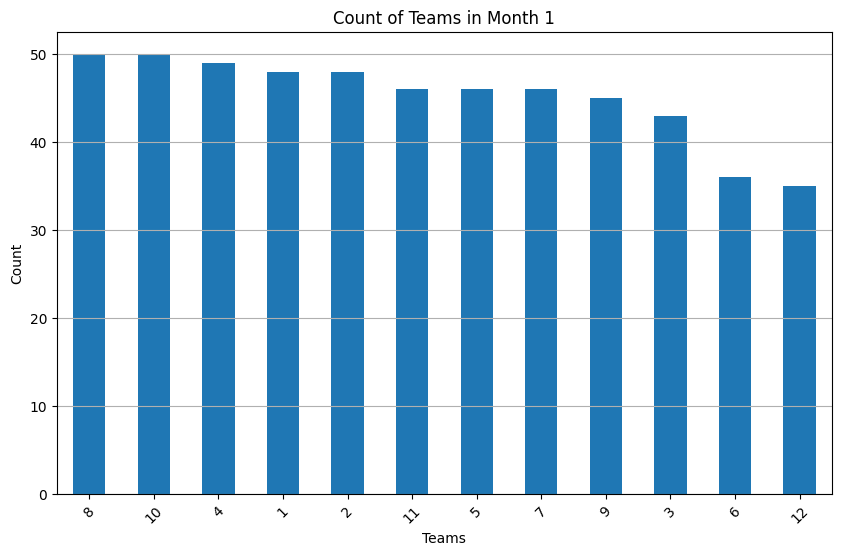

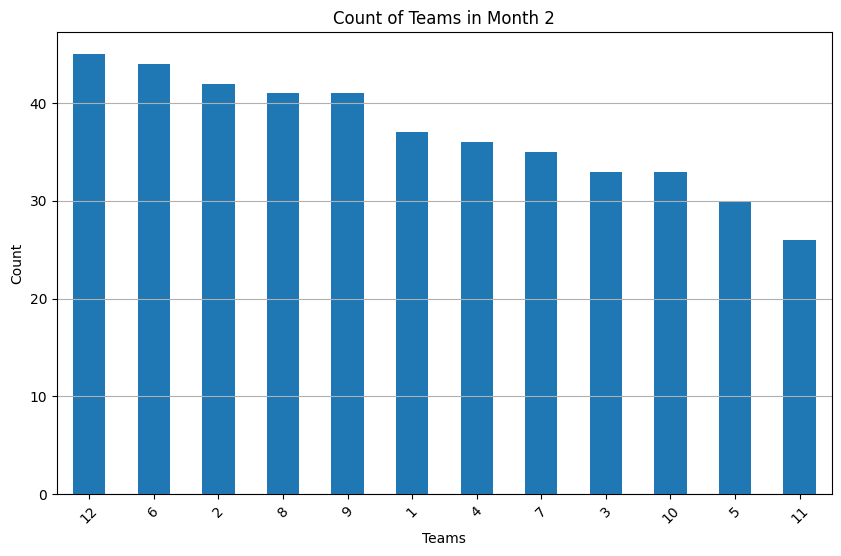

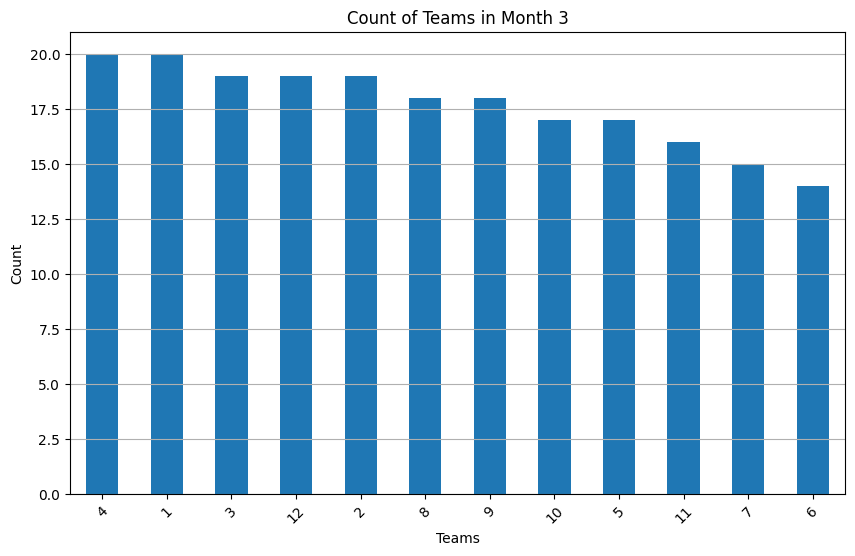

Number of entries in the DataFrame: 1197


In [259]:
# Convert the 'date' column to datetime format without specifying format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for any rows that have NaT
invalid_dates = df[df['date'].isna()]
if not invalid_dates.empty:
    print("Invalid date entries:")
    print(invalid_dates)

# Extract the month from the date
df['month'] = df['date'].dt.month

# Proceed with your analysis and plotting
unique_months = df['month'].unique()
for month in unique_months:
    monthly_df = df[df['month'] == month]
    team_counts = monthly_df['team'].value_counts()  # Adjust 'team' to your actual column name

    plt.figure(figsize=(10, 6))
    team_counts.plot(kind='bar')
    plt.title(f'Count of Teams in Month {month}')
    plt.xlabel('Teams')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Number of entries (rows) in the DataFrame
num_entries = df.shape[0]

print(f"Number of entries in the DataFrame: {num_entries}")

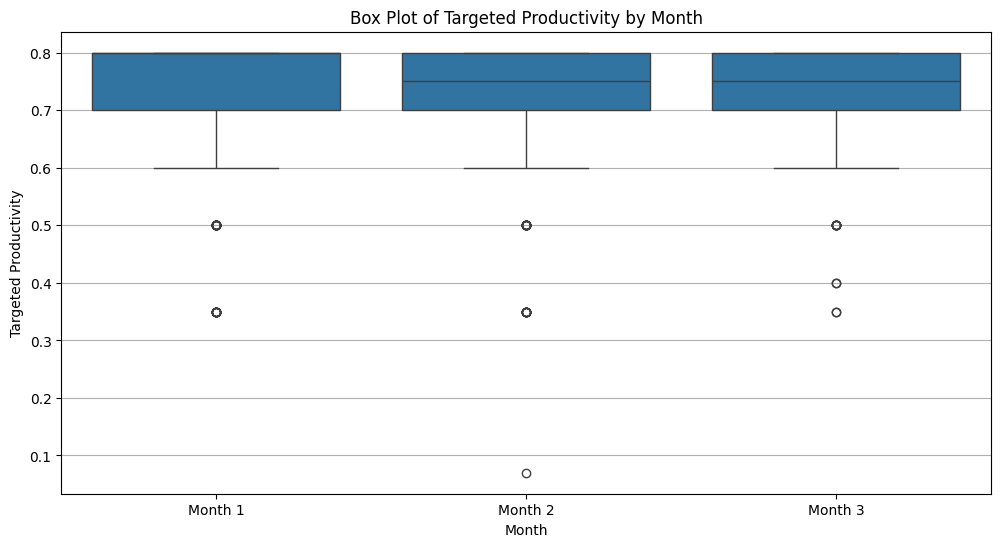

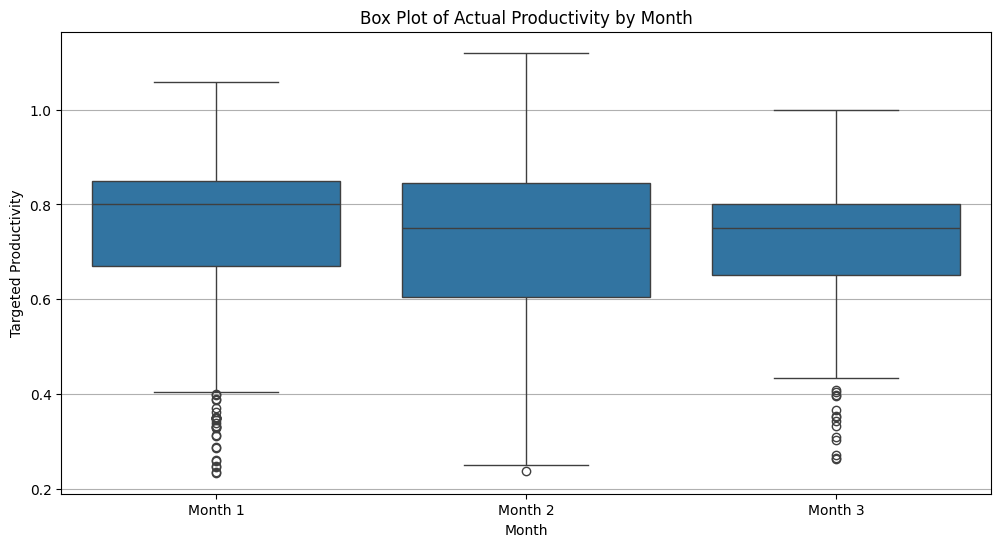

Number of entries in the DataFrame: 1197


In [260]:
# Convert the 'date' column to datetime format and extract the month
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# Get the unique months present in the DataFrame
unique_months = df['month'].unique()

# Create the box plot only for the unique months present
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='month', y='targeted_productivity', order=sorted(unique_months))
plt.title('Box Plot of Targeted Productivity by Month')
plt.xlabel('Month')
plt.ylabel('Targeted Productivity')
plt.xticks(ticks=range(len(unique_months)), labels=[f'Month {m}' for m in sorted(unique_months)])
plt.grid(axis='y')
plt.show()

# Create the box plot only for the unique months present
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='month', y='actual_productivity', order=sorted(unique_months))
plt.title('Box Plot of Actual Productivity by Month')
plt.xlabel('Month')
plt.ylabel('Targeted Productivity')
plt.xticks(ticks=range(len(unique_months)), labels=[f'Month {m}' for m in sorted(unique_months)])
plt.grid(axis='y')
plt.show()

# Number of entries (rows) in the DataFrame
num_entries = df.shape[0]

print(f"Number of entries in the DataFrame: {num_entries}")

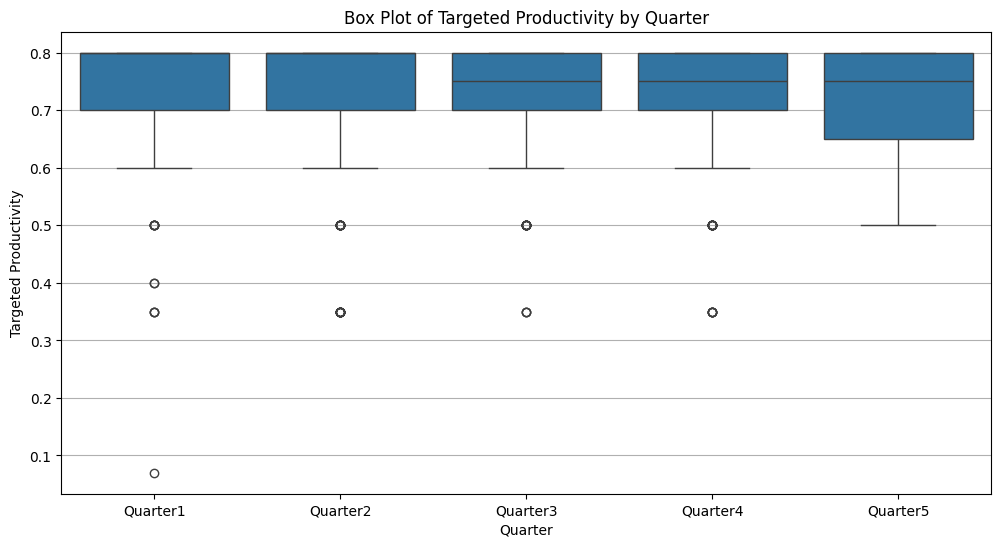

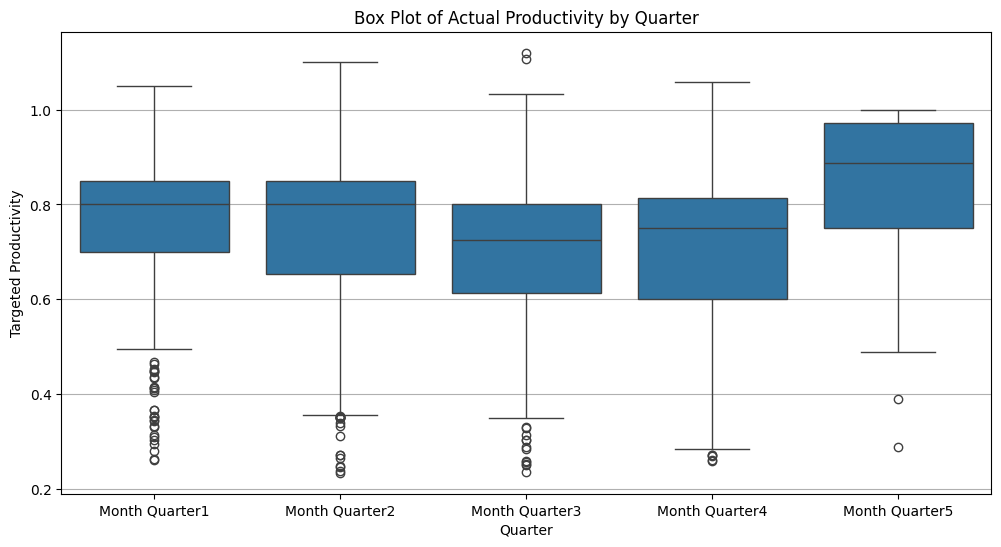

Number of entries in the DataFrame: 1197


In [261]:
# Get the unique quarters present in the DataFrame
unique_quarter = df['quarter'].unique()


plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='quarter', y='targeted_productivity', order=sorted(unique_quarter))
plt.title('Box Plot of Targeted Productivity by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Targeted Productivity')
plt.xticks(ticks=range(len(unique_quarter)), labels=[f'{q}' for q in sorted(unique_quarter)])
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='quarter', y='actual_productivity', order=sorted(unique_quarter))
plt.title('Box Plot of Actual Productivity by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Targeted Productivity')
plt.xticks(ticks=range(len(unique_quarter)), labels=[f'Month {q}' for q in sorted(unique_quarter)])
plt.grid(axis='y')
plt.show()

# Number of entries (rows) in the DataFrame
num_entries = df.shape[0]

print(f"Number of entries in the DataFrame: {num_entries}")

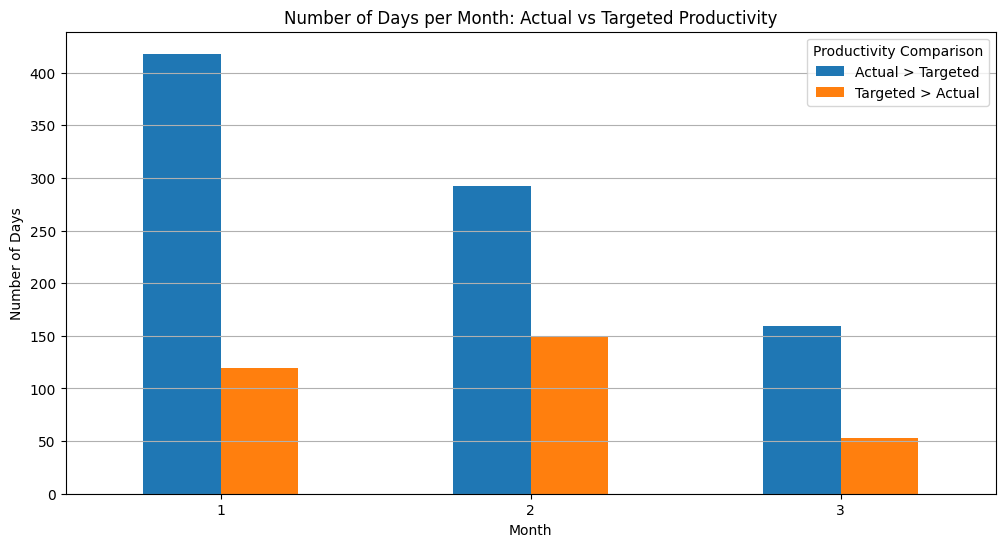

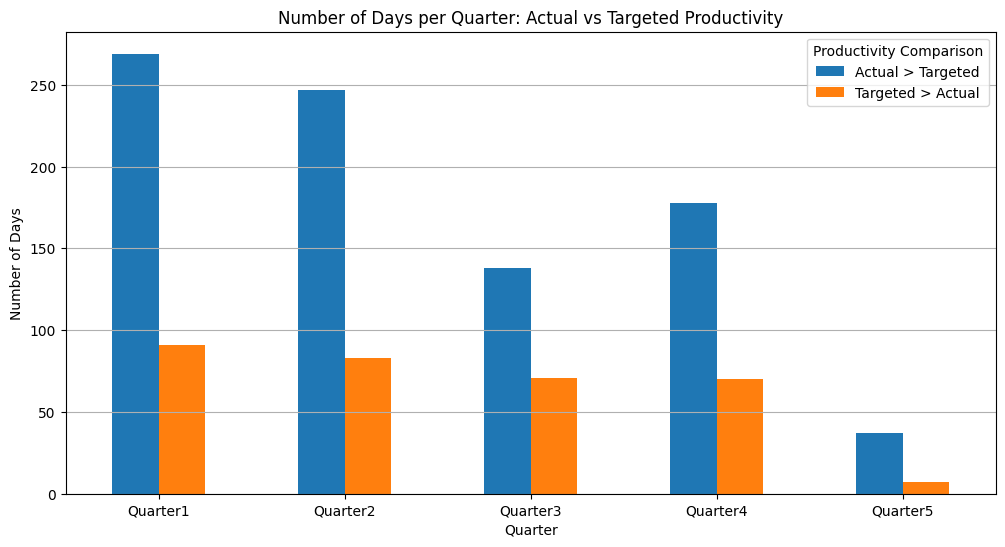

Number of entries in the DataFrame: 1197


In [262]:
# Assuming your DataFrame is named df and has the necessary columns
# Ensure 'date' is in datetime format and extract the month
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# Create conditions for actual vs targeted productivity
df['actual_greater_than_targeted'] = df['actual_productivity'] > df['targeted_productivity']
df['targeted_greater_than_actual'] = df['targeted_productivity'] > df['actual_productivity']

# Count the number of days per month for each condition
actual_greater_count = df.groupby('month')['actual_greater_than_targeted'].sum()
targeted_greater_count = df.groupby('month')['targeted_greater_than_actual'].sum()

# Create a combined DataFrame for plotting
counts_df = pd.DataFrame({
    'Actual > Targeted': actual_greater_count,
    'Targeted > Actual': targeted_greater_count
}).fillna(0)  # Fill NaN values with 0 if no days meet the condition

# Plotting
counts_df.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Days per Month: Actual vs Targeted Productivity')
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.xticks(rotation=0)  # Rotate x-tick labels if needed
plt.legend(title='Productivity Comparison')
plt.grid(axis='y')
plt.show()

# Count the number of days per month for each condition
actual_greater_count = df.groupby('quarter')['actual_greater_than_targeted'].sum()
targeted_greater_count = df.groupby('quarter')['targeted_greater_than_actual'].sum()

# Create a combined DataFrame for plotting
counts_df = pd.DataFrame({
    'Actual > Targeted': actual_greater_count,
    'Targeted > Actual': targeted_greater_count
}).fillna(0)  # Fill NaN values with 0 if no days meet the condition

# Plotting
counts_df.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Days per Quarter: Actual vs Targeted Productivity')
plt.xlabel('Quarter')
plt.ylabel('Number of Days')
plt.xticks(rotation=0)  # Rotate x-tick labels if needed
plt.legend(title='Productivity Comparison')
plt.grid(axis='y')
plt.show()

# Number of entries (rows) in the DataFrame
num_entries = df.shape[0]

print(f"Number of entries in the DataFrame: {num_entries}")


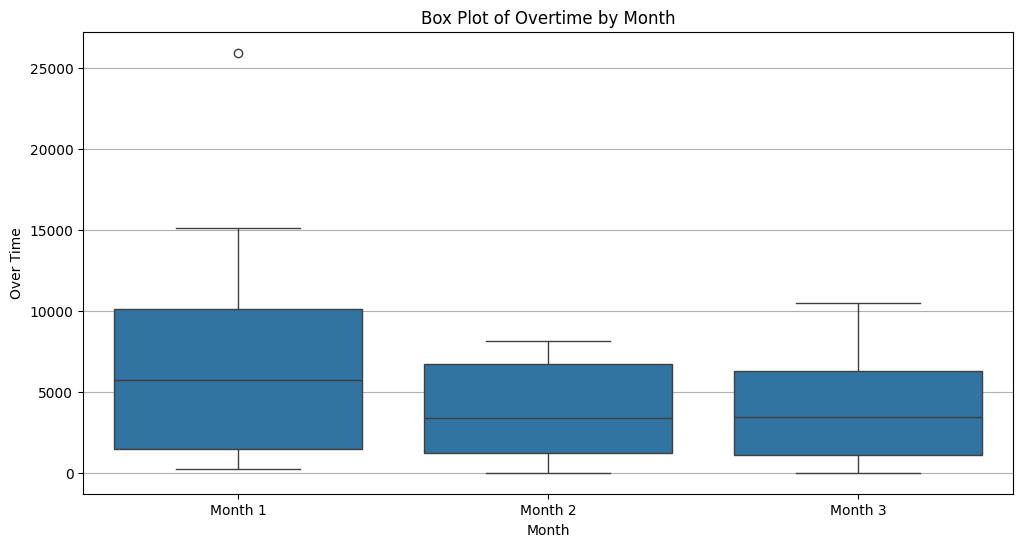

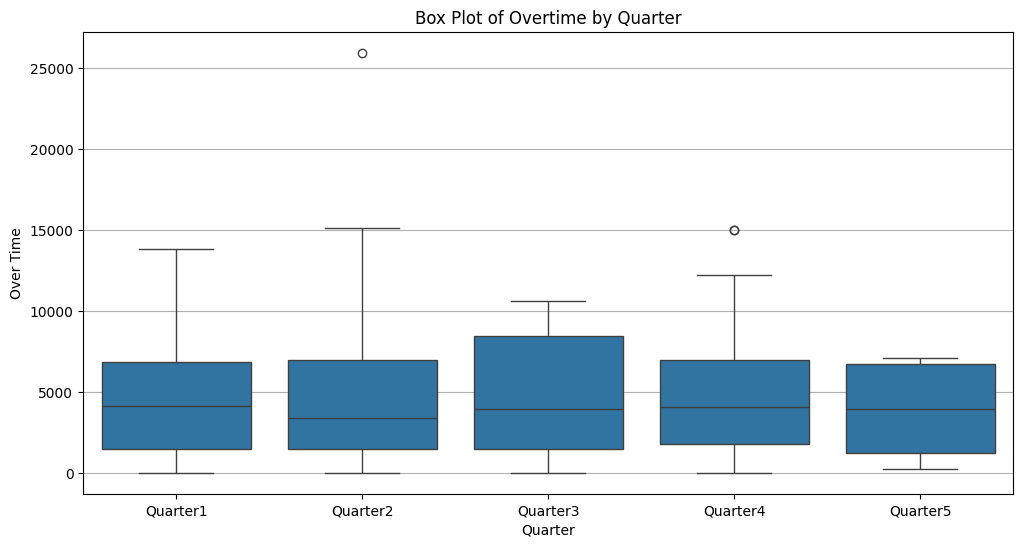

Number of entries in the DataFrame: 1197


In [263]:
# Convert the 'date' column to datetime format and extract the month
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# Get the unique months present in the DataFrame
unique_months = df['month'].unique()

# Create the box plot only for the unique months present
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='month', y='over_time', order=sorted(unique_months))
plt.title('Box Plot of Overtime by Month')
plt.xlabel('Month')
plt.ylabel('Over Time')
plt.xticks(ticks=range(len(unique_months)), labels=[f'Month {m}' for m in sorted(unique_months)])
plt.grid(axis='y')
plt.show()

unique_quarter = df['quarter'].unique()

# Create the box plot for the unique quarters present
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='quarter', y='over_time', order=sorted(unique_quarter))
plt.title('Box Plot of Overtime by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Over Time')
plt.xticks(ticks=range(len(sorted(unique_quarter))), labels=[f'{q}' for q in sorted(unique_quarter)])
plt.grid(axis='y')
plt.show()

# Number of entries (rows) in the DataFrame
num_entries = df.shape[0]

print(f"Number of entries in the DataFrame: {num_entries}")

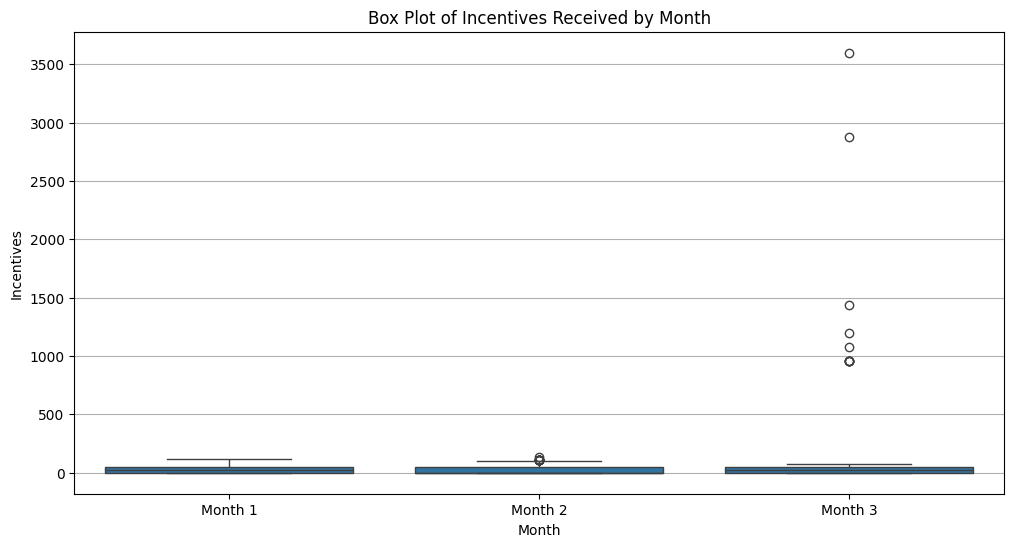

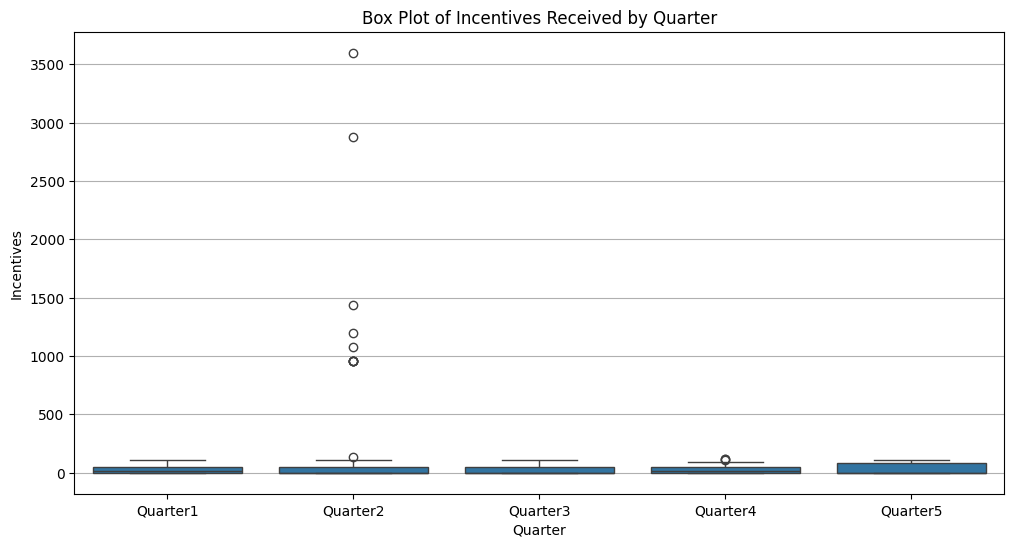

Number of entries in the DataFrame: 1197


In [264]:
# Convert the 'date' column to datetime format and extract the month
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# Get the unique months present in the DataFrame
unique_months = df['month'].unique()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='month', y='incentive')
plt.title('Box Plot of Incentives Received by Month')
plt.xlabel('Month')
plt.ylabel('Incentives')
plt.xticks(ticks=range(len(unique_months)), labels=[f'Month {m}' for m in sorted(unique_months)])
plt.grid(axis='y')
plt.show()

# Get the unique quarters present in the DataFrame
unique_quarter = df['quarter'].unique()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='quarter', y='incentive')
plt.title('Box Plot of Incentives Received by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Incentives')
plt.xticks(ticks=range(len(sorted(unique_quarter))), labels=[f'{q}' for q in sorted(unique_quarter)])
plt.grid(axis='y')
plt.show()

# Number of entries (rows) in the DataFrame
num_entries = df.shape[0]

print(f"Number of entries in the DataFrame: {num_entries}")

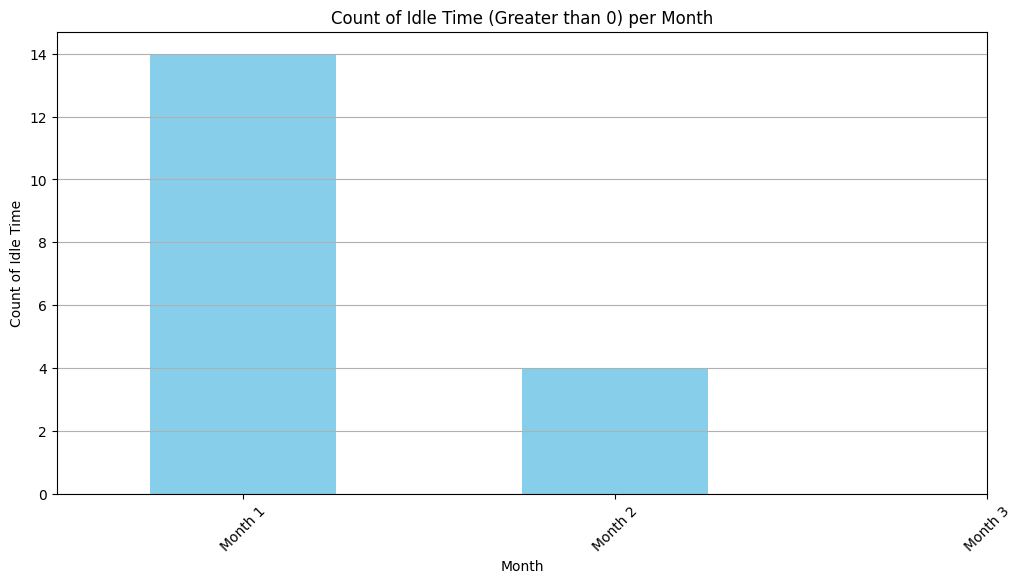

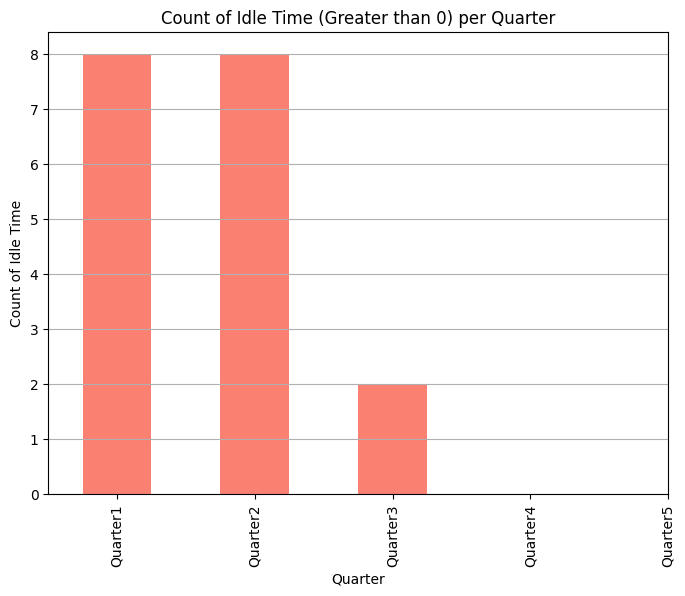

Number of entries in the DataFrame: 1197


In [265]:
# Convert the 'date' column to datetime format and extract the month
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# Get the unique months present in the DataFrame
unique_months = df['month'].unique()

# Count idle times greater than 0 for each unique month
monthly_idle_time_counts = df[df['idle_time'] > 0].groupby('month').size()

# Keep only counts for months present in the DataFrame
monthly_idle_time_counts = monthly_idle_time_counts[monthly_idle_time_counts.index.isin(unique_months)]

# Create a bar plot for idle times per month
plt.figure(figsize=(12, 6))
monthly_idle_time_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Idle Time (Greater than 0) per Month')
plt.xlabel('Month')
plt.ylabel('Count of Idle Time')
plt.xticks(ticks=range(len(unique_months)), labels=[f'Month {m}' for m in sorted(unique_months)], rotation=45)
plt.grid(axis='y')
plt.show()

# Get the unique quarters present in the DataFrame
unique_quarter = df['quarter'].unique()

# Count idle times greater than 0 for each unique quarter
quarterly_idle_time_counts = df[df['idle_time'] > 0].groupby('quarter').size()

# Keep only counts for quarters present in the DataFrame
quarterly_idle_time_counts = quarterly_idle_time_counts[quarterly_idle_time_counts.index.isin(unique_quarter)]

# Create a bar plot for idle times per quarter
plt.figure(figsize=(8, 6))
quarterly_idle_time_counts.plot(kind='bar', color='salmon')
plt.title('Count of Idle Time (Greater than 0) per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count of Idle Time')
plt.xticks(ticks=range(len(unique_quarter)), labels=[f'{q}' for q in sorted(unique_quarter)])
plt.grid(axis='y')
plt.show()

# Number of entries (rows) in the DataFrame
num_entries = df.shape[0]

print(f"Number of entries in the DataFrame: {num_entries}")

C:\Users\jorda\AppData\Local\Temp\ipykernel_17108\2244569830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idle_time['date'] = pd.to_datetime(df_idle_time['date'])
C:\Users\jorda\AppData\Local\Temp\ipykernel_17108\2244569830.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idle_time['month'] = df_idle_time['date'].dt.month


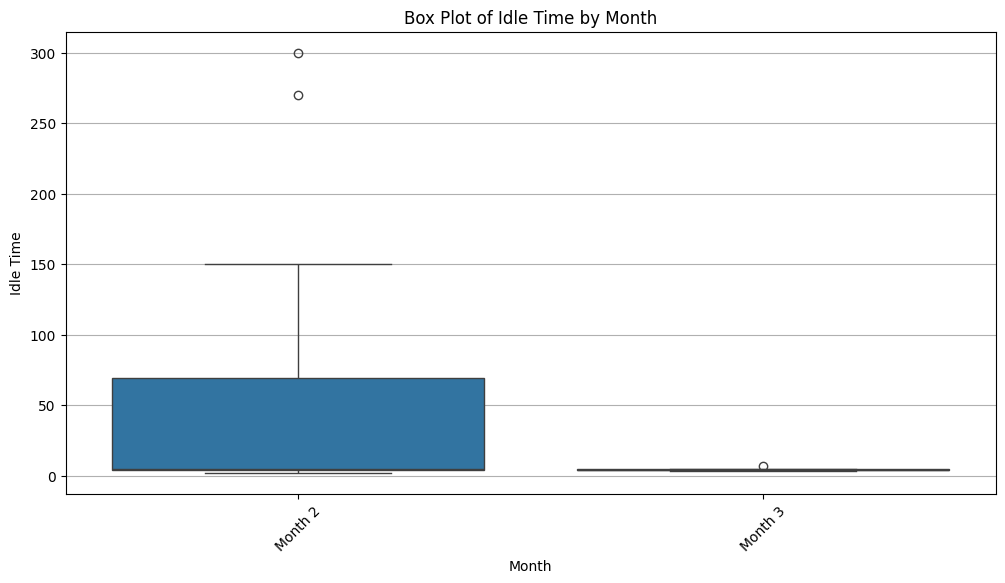

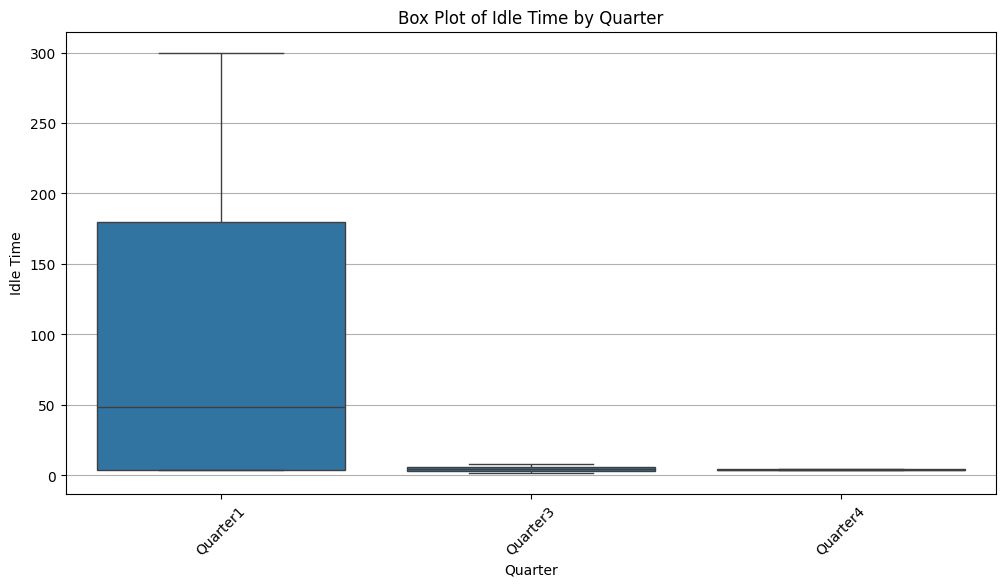

Number of entries in the DataFrame: 1197


In [266]:
df_idle_time = df['idle_time'] = df['idle_time'].replace(0, np.nan)
df_idle_time = df.dropna(subset=['idle_time'])

# Convert the 'date' column to datetime format and extract the month and quarter
df_idle_time['date'] = pd.to_datetime(df_idle_time['date'])
df_idle_time['month'] = df_idle_time['date'].dt.month

# Get unique months and quarters present in the DataFrame
unique_months = df_idle_time['month'].unique()
unique_quarters = df_idle_time['quarter'].unique()

# Create a box plot for idle time per month
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_idle_time, x='month', y='idle_time', order=sorted(unique_months))
plt.title('Box Plot of Idle Time by Month')
plt.xlabel('Month')
plt.ylabel('Idle Time')
plt.xticks(ticks=range(len(unique_months)), labels=[f'Month {m}' for m in sorted(unique_months)], rotation=45)
plt.grid(axis='y')
plt.show()

# Create a box plot for idle time per quarter
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_idle_time, x='quarter', y='idle_time', order=sorted(unique_quarters))
plt.title('Box Plot of Idle Time by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Idle Time')
plt.xticks(ticks=range(len(unique_quarters)), labels=[f'{q}' for q in sorted(unique_quarters)], rotation=45)
plt.grid(axis='y')
plt.show()

# Number of entries (rows) in the DataFrame
num_entries = df.shape[0]

print(f"Number of entries in the DataFrame: {num_entries}")


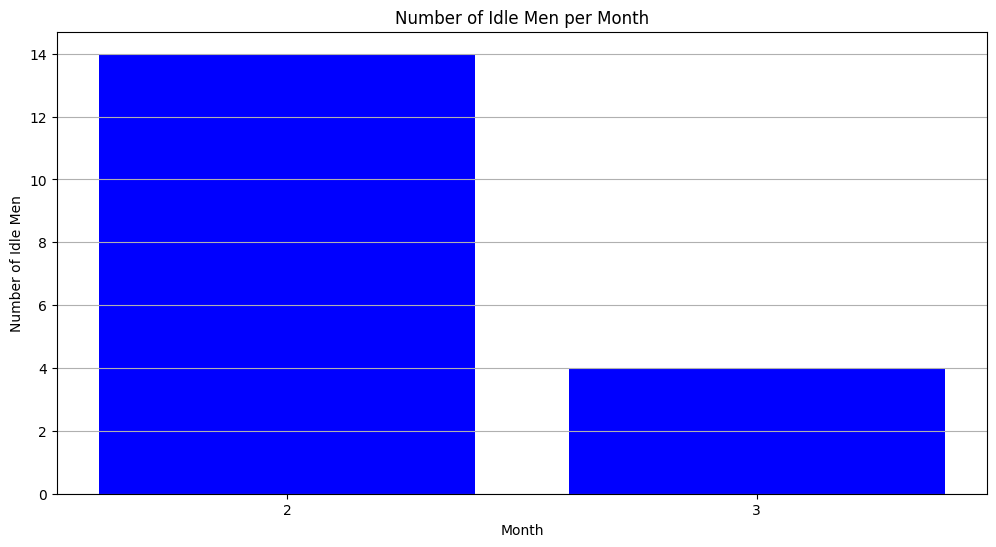

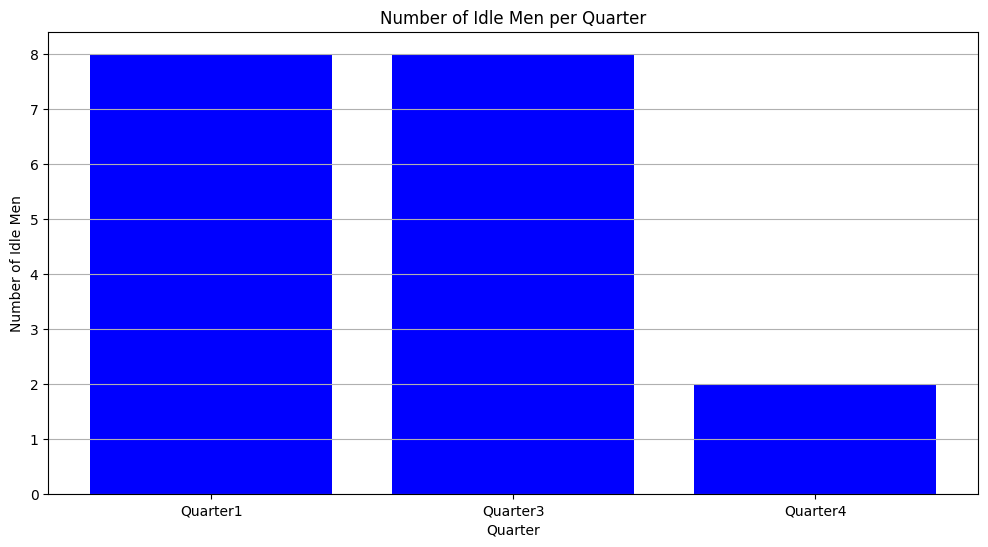

Number of entries in the DataFrame: 1197


In [267]:
# Ensure 'date' is in datetime format and extract month and quarter
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# Filter the DataFrame for idle_men > 0
filtered_df = df[df['idle_men'] > 0]

# Count idle_men per month
idle_men_per_month = filtered_df.groupby('month')['idle_men'].count()

# Count idle_men per quarter
idle_men_per_quarter = filtered_df.groupby('quarter')['idle_men'].count()

# Plotting for months
plt.figure(figsize=(12, 6))
plt.bar(idle_men_per_month.index, idle_men_per_month.values, color='blue')
plt.title('Number of Idle Men per Month')
plt.xlabel('Month')
plt.ylabel('Number of Idle Men')
plt.xticks(idle_men_per_month.index)  # Set x-ticks to show month numbers
plt.grid(axis='y')
plt.show()

# Plotting for quarters
plt.figure(figsize=(12, 6))
plt.bar(idle_men_per_quarter.index, idle_men_per_quarter.values, color='blue')
plt.title('Number of Idle Men per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Idle Men')
plt.xticks(idle_men_per_quarter.index)  # Set x-ticks to show quarter numbers
plt.grid(axis='y')
plt.show()

# Number of entries (rows) in the DataFrame
num_entries = df.shape[0]

print(f"Number of entries in the DataFrame: {num_entries}")


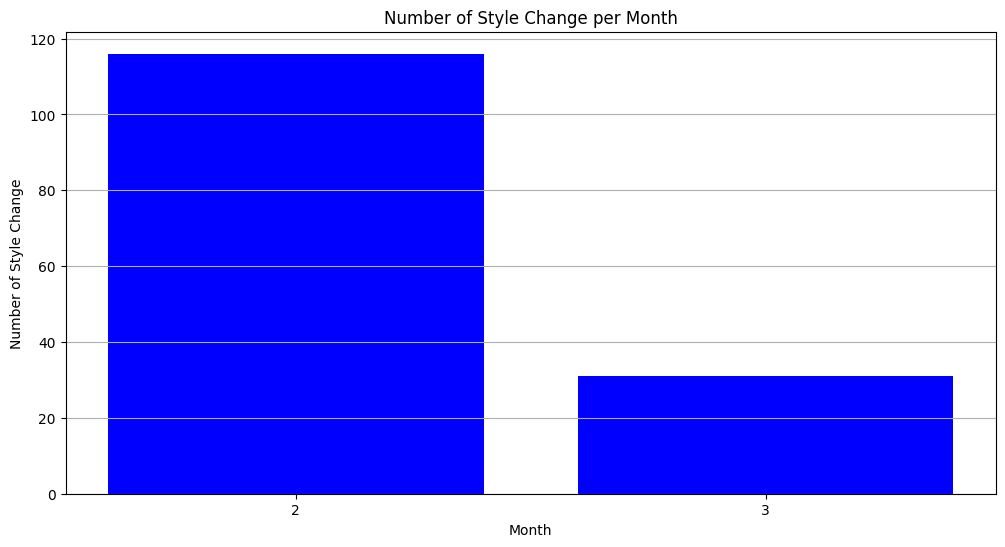

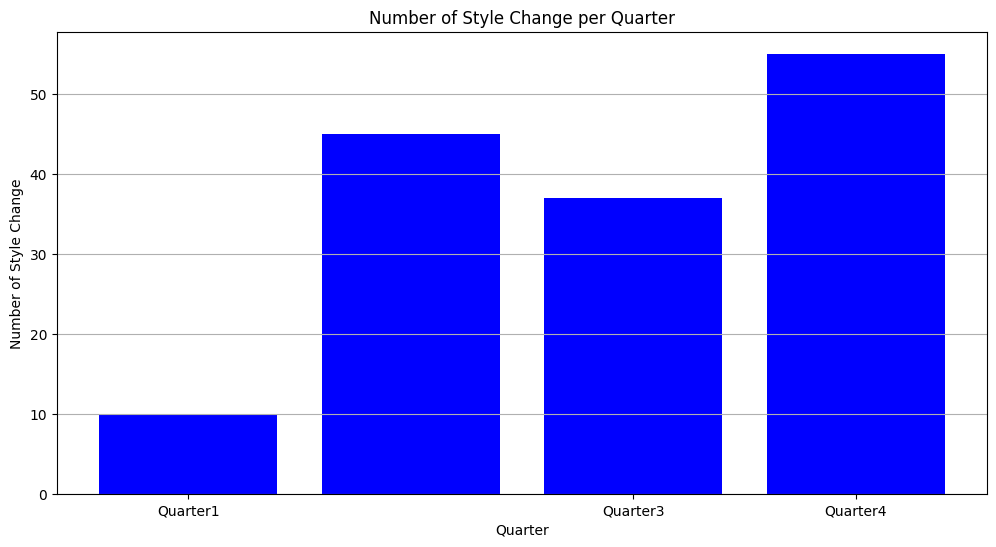

Number of entries in the DataFrame: 1197


In [268]:
# Ensure 'date' is in datetime format and extract month and quarter
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# Filter the DataFrame for idle_men > 0
filtered_df = df[df['no_of_style_change'] > 0]

# Count idle_men per month
no_of_style_change_per_month = filtered_df.groupby('month')['no_of_style_change'].count()

# Count idle_men per quarter
no_of_style_change_per_quarter = filtered_df.groupby('quarter')['no_of_style_change'].count()

# Plotting for months
plt.figure(figsize=(12, 6))
plt.bar(no_of_style_change_per_month.index, no_of_style_change_per_month.values, color='blue')
plt.title('Number of Style Change per Month')
plt.xlabel('Month')
plt.ylabel('Number of Style Change')
plt.xticks(idle_men_per_month.index)  # Set x-ticks to show month numbers
plt.grid(axis='y')
plt.show()

# Plotting for quarters
plt.figure(figsize=(12, 6))
plt.bar(no_of_style_change_per_quarter.index, no_of_style_change_per_quarter.values, color='blue')
plt.title('Number of Style Change per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Style Change')
plt.xticks(idle_men_per_quarter.index)  # Set x-ticks to show quarter numbers
plt.grid(axis='y')
plt.show()

# Number of entries (rows) in the DataFrame
num_entries = df.shape[0]

print(f"Number of entries in the DataFrame: {num_entries}")


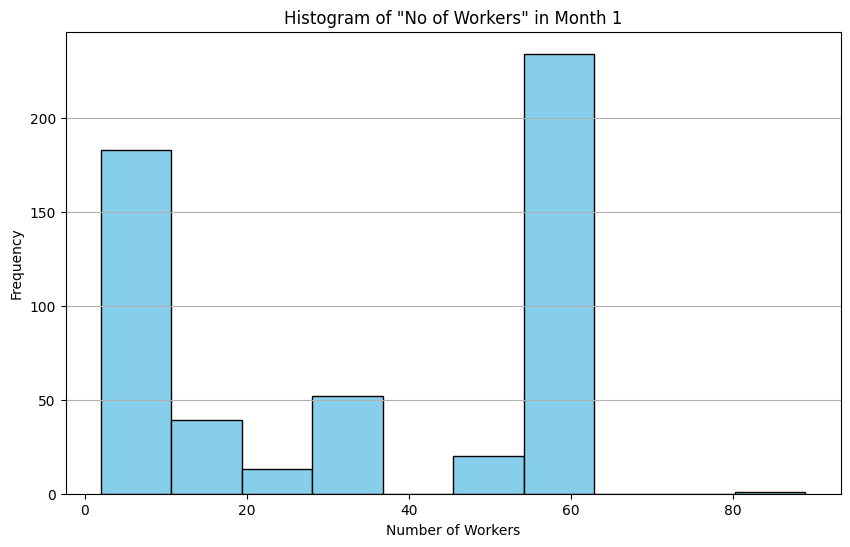

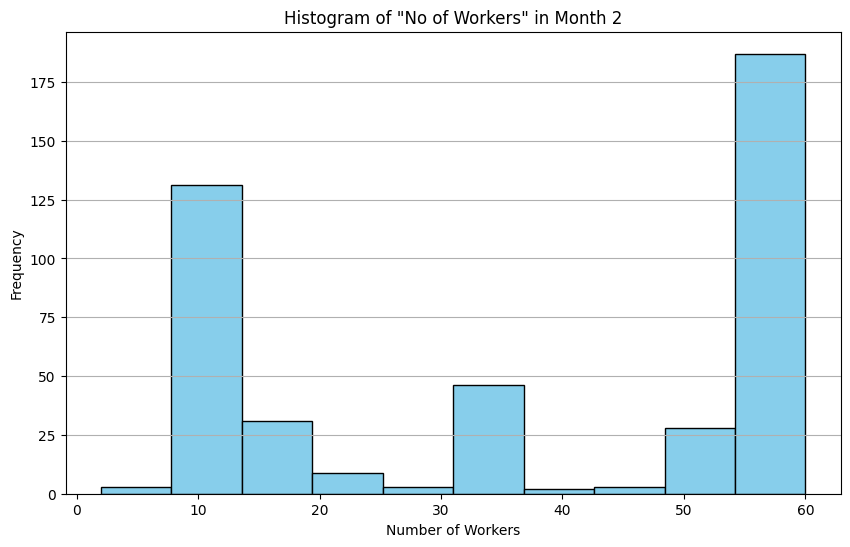

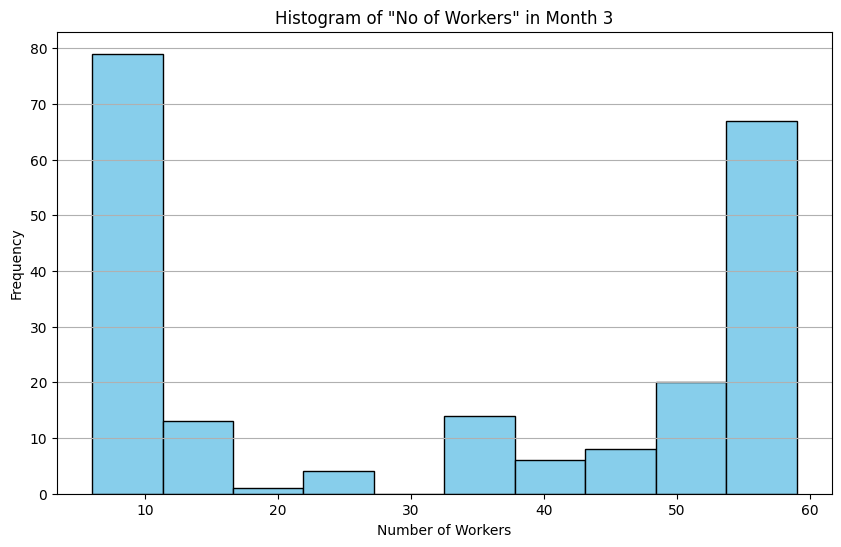

In [269]:
# Convert the 'date' column to datetime format without specifying format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the month from the date
df['month'] = df['date'].dt.month

# Proceed with your analysis and plotting
unique_months = df['month'].unique()
for month in unique_months:
    monthly_df = df[df['month'] == month]
    
    plt.figure(figsize=(10, 6))
    plt.hist(monthly_df['no_of_workers'], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of "No of Workers" in Month {month}')
    plt.xlabel('Number of Workers')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()


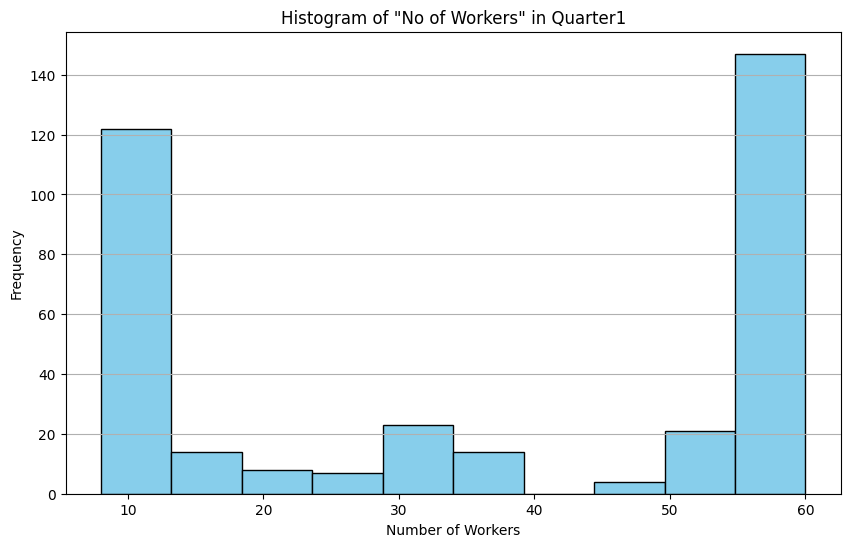

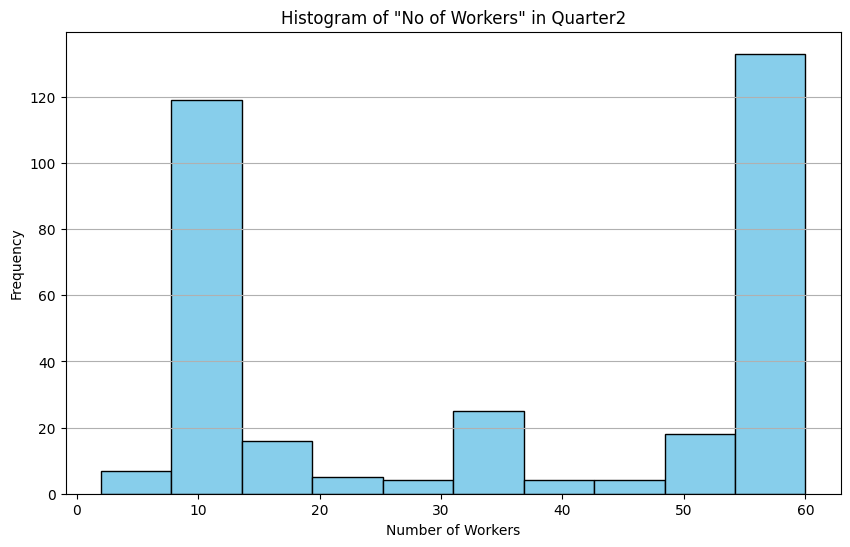

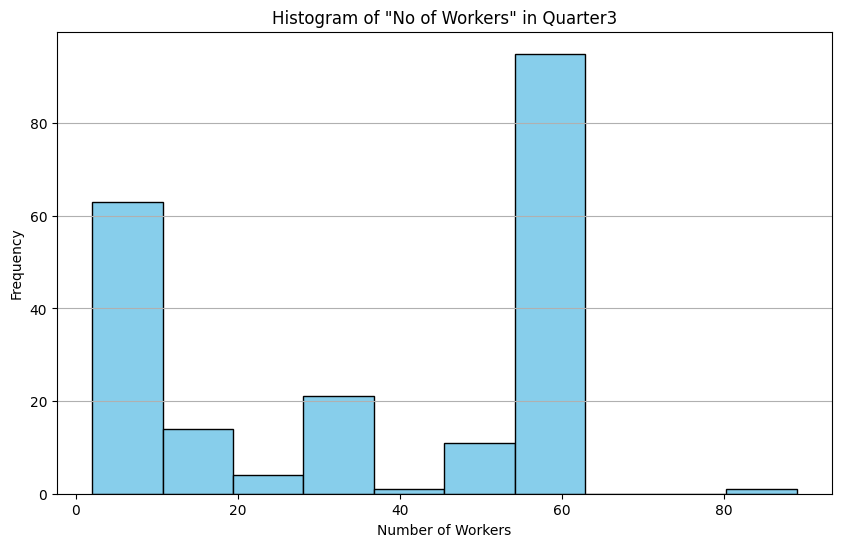

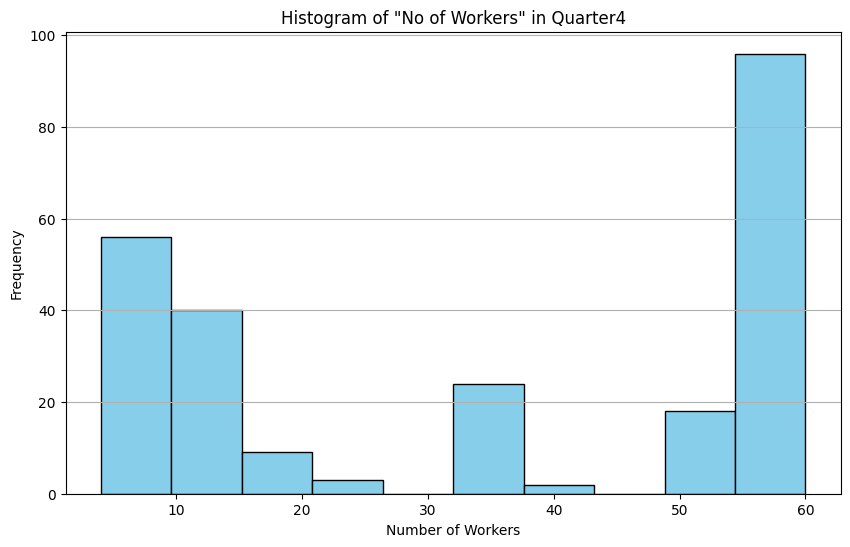

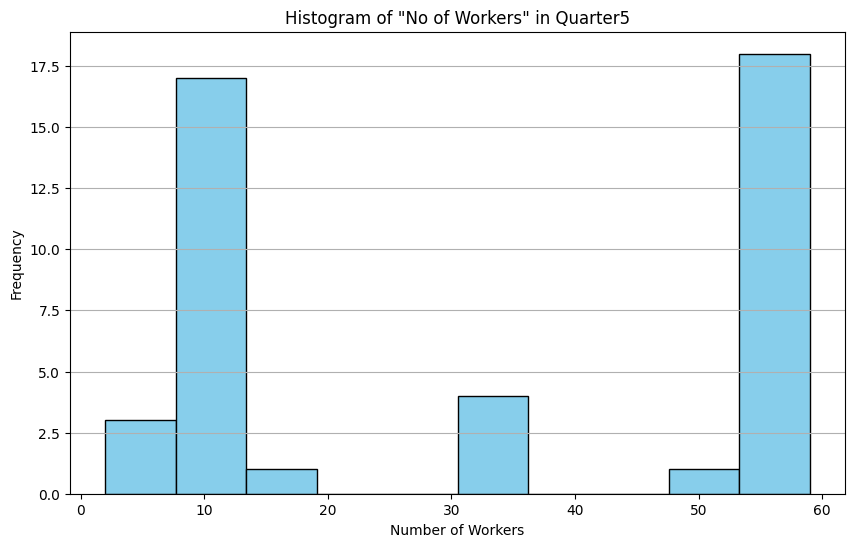

In [271]:
# Proceed with your analysis and plotting
unique_quarter = df['quarter'].unique()
for quarter in unique_quarter:
    quarter_df = df[df['quarter'] == quarter]
    
    plt.figure(figsize=(10, 6))
    plt.hist(quarter_df['no_of_workers'], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of "No of Workers" in {quarter}')
    plt.xlabel('Number of Workers')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()
